## Exercise 5: Binary Classification with Automated Hyperparameter Tuning
This time we are going to implement binary classification with Random Forest, but we try to get the optimum Hyperparameter using some Algorithhms.

The steps are:
1.   Load Dataset
2.   Hyperparameter Tuning with Grid Search
3.   Hyperparameter Tuning with Random Search


### 1. Load and Explore Dataset

In [1]:
import pandas as pd
import numpy as np

**[1.1]** Loading Dataset

In [2]:
url='https://drive.google.com/file/d/177p-Vaa2__BtaxNCmd4YGBv7zfENUNmy/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = False)

**[1.2]** Dataset Exploration

In [3]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [5]:
print( f" Percentage Null values - 'age_band' : {100 * df['age_band'].isna().sum() / len(df)}" )
print( f" Percentage Null values - 'gender' : {100 * df['gender'].isna().sum() / len(df)}" )

 Percentage Null values - 'age_band' : 85.56233201611123
 Percentage Null values - 'gender' : 52.77111552723147


In [6]:
df[df.duplicated()]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


In [7]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique())

ID
[     1      2      3 ... 154137 154138 154139]
Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[

### 2. Data Preparation

In [9]:
df_cleaned = df.copy()

In [10]:
## Dropping columns ID, gender and age_band
df_cleaned.drop(['ID','gender', 'age_band'], axis = 1, inplace = True)

In [11]:
#Applying one-hot encoding to the nominal data 'Car_model'
df_car_model = pd.get_dummies(df_cleaned['car_model'])
df_car_model

,model_1,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
131335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### We will map numerical values to the ordinal data under 'car_segment'

In [12]:
ord_cols = ['car_segment']
for col in ord_cols:
  print(col)
  print(df_cleaned[col].unique()) 

car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [13]:
car_segment_mapper = {
    "Other": 0, 
    "LCV": 1, 
    "Small/Medium": 2,
    "Large/SUV": 3
}
car_segment_mapper

{'Other': 0, 'LCV': 1, 'Small/Medium': 2, 'Large/SUV': 3}

In [14]:
df_cleaned["car_segment"] = df_cleaned["car_segment"].replace(car_segment_mapper)
df_cleaned["car_segment"]

0         1
1         2
2         3
3         3
4         2
         ..
131332    3
131333    3
131334    3
131335    3
131336    1
Name: car_segment, Length: 131337, dtype: int64

 #### Merging the encoded data-frame

In [15]:
X = pd.concat([df_cleaned, df_car_model], axis=1)
X.drop('car_model', axis = 1, inplace = True)

In [16]:
y = X.pop('Target')

### 3. Scale Data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.64100321,  1.23342356, -1.19699048, ..., -0.25750093,
        -0.22712936, -0.08732716],
       [-0.28324066,  0.17830704,  1.5766297 , ..., -0.25750093,
        -0.22712936, -0.08732716],
       [ 1.07452189,  1.23342356,  1.5766297 , ..., -0.25750093,
        -0.22712936, -0.08732716],
       ...,
       [ 1.07452189, -0.52510398, -0.50358543, ..., -0.25750093,
        -0.22712936, -0.08732716],
       [ 1.07452189, -1.22851499, -1.543693  , ..., -0.25750093,
        -0.22712936, -0.08732716],
       [-1.64100321,  0.17830704, -1.543693  , ..., -0.25750093,
        -0.22712936, -0.08732716]])

### 4. Data Splitting

In [18]:
y.value_counts(normalize=True)

0    0.973191
1    0.026809
Name: Target, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

In [21]:
y_test.value_counts(normalize=True)

0    0.971867
1    0.028133
Name: Target, dtype: float64

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [23]:
y_train.value_counts(normalize=True)

0    0.973494
1    0.026506
Name: Target, dtype: float64

In [24]:
y_val.value_counts(normalize=True)

0    0.973637
1    0.026363
Name: Target, dtype: float64

## 5. Hyperparameter Tuning with Grid Search

**[5.1]** Import GridSearchCV from sklearn.model_selection


In [26]:
from sklearn.model_selection import GridSearchCV

**[5.2]** Let's create a dictionary containing the grid search parameters


In [27]:
hyperparams_grid = {
    'n_estimators': np.arange(10, 100, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(2, 20, 4)
    }
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18])}

**[5.3]** Import the RandomForestClassifier from sklearn.ensemble and instantiate the RandomForestClassifier class called rf with a random state=8

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=8)

**[5.4]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model

In [31]:
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

**[5.5]** Fit the GridSearchCV on the training set

In [33]:
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 125 candidates, totalling 250 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

**[5.6]** Display the best set of hyperparameters

In [35]:
grid_search_rf.best_params_

{'max_depth': 25, 'min_samples_leaf': 2, 'n_estimators': 90}

**[5.6]** Display the accuracy score on all 3 sets

In [37]:
print(grid_search_rf.score(X_train, y_train))
print(grid_search_rf.score(X_val, y_val))
print(grid_search_rf.score(X_test, y_test))

0.9967878175004461
0.9917673931664605
0.9912821684178468


## 6. Hyperparameter Tuning with Random Search

**[6.1]** Import randint from scipy.stats 

In [39]:
from scipy.stats import randint

**[6.2]** Let's define the hyperparameters value randomly

In [40]:
hyperparams_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 30),
    'min_samples_leaf': randint(2, 20)
    }

**[6.3]** Import RandomizedSearchCV and KFold from sklearn.model_selection

In [42]:
from sklearn.model_selection import RandomizedSearchCV, KFold

**[6.4]** Instantiate a KFold with 5 splits

In [44]:
kf_cv = KFold(n_splits=5)

**[6.5]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [46]:
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

**[6.6]** Fit the RandomizedSearchCV on the training set

In [48]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C2E616B80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C2E63F430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C2E59A220>},
                   random_state=8, verbose=1)

**[6.7]** Display the best set of hyperparameters

In [50]:
random_search_rf.best_params_

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 69}

**[6.8]** Display the accuracy score on all 3 sets

In [52]:
print(random_search_rf.score(X_train, y_train))
print(random_search_rf.score(X_val, y_val))
print(random_search_rf.score(X_test, y_test))

0.9935637380286717
0.9909108213571904
0.9900258870108116


**[6.9]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[6.10]** Task: Plot the confusion matrics for the training, validation and testing sets

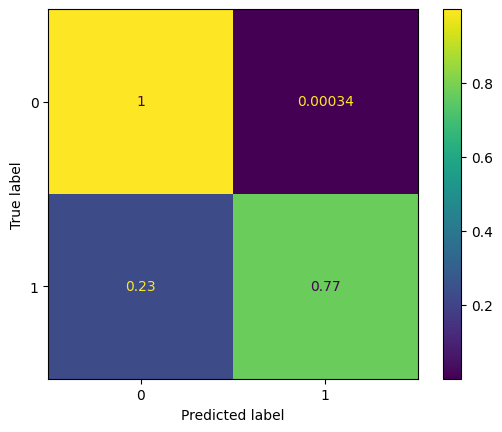

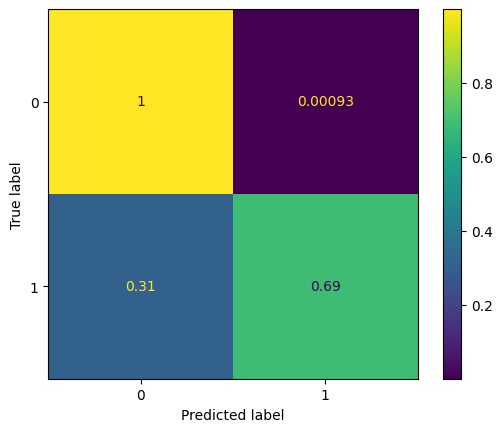

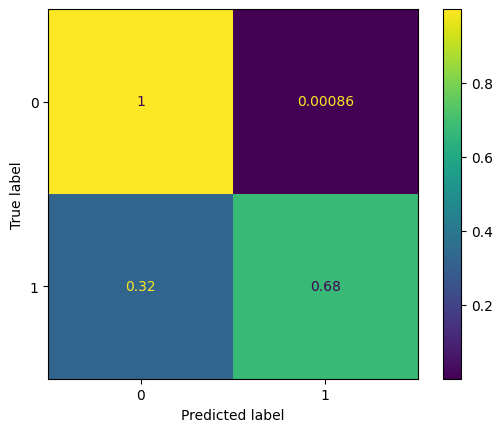

In [56]:
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_test, y_test, normalize='true')